In [1]:
import numpy as np
from lvl1_loadPressureData import loadPressureData
from lvl1_detide import detide
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pathlib import Path
import xarray as xr
from scipy.signal import spectrogram

Hello November!!! Ok I just met with BK and his simple code helped me realize that I'm doing way too much rn. This week's goals are to:

- organize scripts by level 1 and level 2

- cleanly compute setup

- have powerpoint ready to go with "story"



# 3NOV - 5NOV

- Save sensor 1/5 dataframes into .parquet files
- plot cross shore water level gradients for sensor 1 and sensor 5
- create simple function for Hs computation
- plot Hs, [total, infragravity, and sea/swell band] comparisons for sensor 1/5


##### Process matlab files into pandas dataframes

MoA18411 - SBE
MoA68411 - SBE
MoB28411 - AQD
MoA5 - AQD


In [ ]:
### ---------------------- DATA PROCESSING -------------------------- ###
mat1 = 'data_raw/MoA18411.mat'
mat5 = 'data_raw/MoA58411.mat'
# this function fills the 20s gap with NaNs after the 12hr datacollection sesh
df1 = loadPressureData(mat1, units="psi", is_gauge=False, patm_psi=14.7)
df5 = loadPressureData(mat5, units='dbar', is_gauge=True, patm_dbar=1.01325)

# detides using Utide 
LAT = 21.58055556
#df1hp = detide(df1h, col = "p", LAT=LAT, inplace=True)
#df5hp = detide(df5h, col = "p", LAT=LAT, inplace=True)

prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.
prep/calcs ... done.


In [ ]:
# save df1 and df5 so I don't need to keep using detide which is pretty computationally expensive
df1hp.to_parquet('data_interim/df1.parquet')
df5hp.to_parquet('data_interim/df5.parquet')

# to load: 
# df1 = pd.read_parquet("data_interim/df1.parquet")


In [26]:
# take 15 min means of water level 
df1['h_15'] = df1['h'].resample('15T').transform('mean')
df5['h_15'] = df5['h'].resample('15T').transform('mean')
# remove mean 
df1['h_15_demean'] = df1['h_15'] - df1['h_15'].mean()
df5['h_15_demean'] = df5['h_15'] - df5['h_15'].mean()

/var/folders/7q/04p1sn755vg5x39skt2hykjh0000gn/T/ipykernel_56598/4012217113.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df1['h_15'] = df1['h'].resample('15T').transform('mean')
/var/folders/7q/04p1sn755vg5x39skt2hykjh0000gn/T/ipykernel_56598/4012217113.py:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df5['h_15'] = df5['h'].resample('15T').transform('mean')


##### plot cross shore water level gradients

/var/folders/7q/04p1sn755vg5x39skt2hykjh0000gn/T/ipykernel_56598/3117568691.py:14: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  s1 = df1["h_detided"].resample("15T").mean()
/var/folders/7q/04p1sn755vg5x39skt2hykjh0000gn/T/ipykernel_56598/3117568691.py:15: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  s5 = df5["h_detided"].resample("15T").mean()
/var/folders/7q/04p1sn755vg5x39skt2hykjh0000gn/T/ipykernel_56598/3117568691.py:36: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  r1 = df1["h_detided"].resample('15T').mean() - df1["h_detided"].mean()
/var/folders/7q/04p1sn755vg5x39skt2hykjh0000gn/T/ipykernel_56598/3117568691.py:37: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  r5 = df5["h_detided"].resample('15T').mean() - df5["h_detided"].mean()
/var/folders/7q/04p1sn755vg5

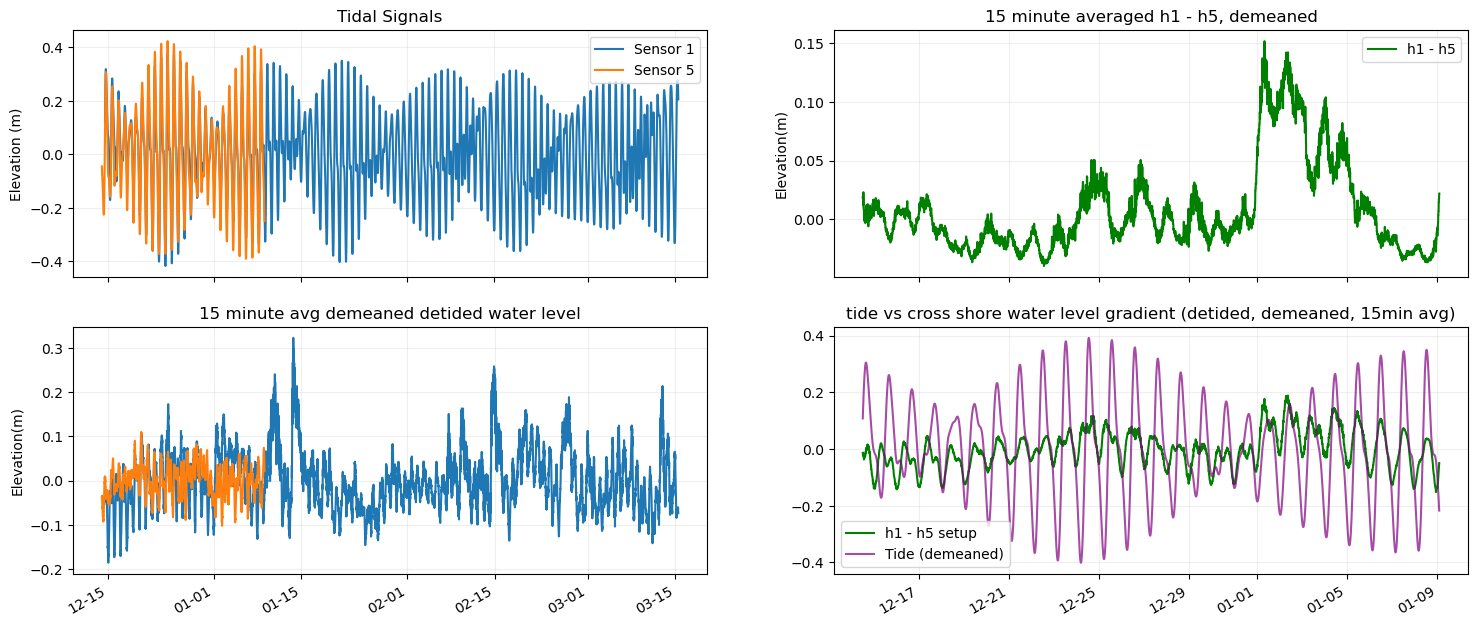

In [62]:
fig, ax = plt.subplots(2,2, figsize=(18,8))

# plot tidal signals                 
ax[0,0].plot(df1.index.values, df1['h_tide'] - df1['h_tide'].mean(), label='Sensor 1')
ax[0,0].plot(df5.index.values, df5['h_tide'] - df5['h_tide'].mean(), label='Sensor 5')
ax[0,0].legend()
ax[0,0].set_title('Tidal Signals')
ax[0,0].set_ylabel('Elevation (m)')
ax[0,0].set_xlabel('Date')

ax[0,0].grid(True, alpha = 0.2)

# plot detided depths
s1 = df1["h_detided"].resample("15T").mean()
s5 = df5["h_detided"].resample("15T").mean()

ax[1,0].plot(s1.index, s1 - s1.mean(), label='Sensor 1')
ax[1,0].plot(s5.index, s5 - s5.mean(), label='Sensor 5')
ax[1,0].set_title('15 minute avg demeaned detided water level')
ax[1,0].set_ylabel('Elevation(m)')

ax[1,0].grid(True, alpha = 0.2)

# plot hi - hf (demeaned)
p1 = df1["h_15"] - df1["h_15"].mean()
p5 = df5["h_15"] - df5["h_15"].mean()
p1_aligned, p5_aligned = p1.align(p5, join="inner")   # keep only overlapping times

ax[0,1].plot(p1_aligned.index, p1_aligned - p5_aligned, label='h1 - h5', color='green')
ax[0,1].set_title('15 minute averaged h1 - h5, demeaned')
ax[0,1].set_ylabel('Elevation(m)')
ax[0,1].grid(True, alpha = 0.2)
ax[0,1].legend()

# plot detided, demeaned hi - hf
r1 = df1["h_detided"].resample('15T').mean() - df1["h_detided"].mean()
r5 = df5["h_detided"].resample('15T').mean() - df5["h_detided"].mean()
r1_aligned, r5_aligned = r1.align(r5, join = 'inner')

# Resample tidal signals
tide1 = df1["h_tide"].resample("15T").mean()
tide5 = df5["h_tide"].resample("15T").mean()

# Align the overlapping segment
tide1_aligned, tide5_aligned = tide1.align(tide5, join="inner")

# Use average of two as reference tide (cleaner)
tide_mean = 0.5 * (tide1_aligned + tide5_aligned)

# Demean (for visual comparability)
tide_anom = tide_mean - tide_mean.mean()

# Now plot it together with setup (r1_aligned - r5_aligned)
setup = (r1_aligned - r5_aligned)

ax[1,1].plot(setup.index, setup, label="h1 - h5 setup", color='green')
ax[1,1].plot(tide_anom.index, tide_anom, label="Tide (demeaned)", alpha=0.7, color='purple')
ax[1,1].set_title('tide vs cross shore water level gradient (detided, demeaned, 15min avg)')
ax[1,1].legend()
ax[1,1].grid(True, alpha=0.2)

date_fmt = mdates.DateFormatter("%m-%d")
for axis in ax.flat:
    axis.xaxis.set_major_formatter(date_fmt)
fig.autofmt_xdate()  

plt.show()



**Interpretation of above plot**

- Top Left: shows Sensor 1 and 5 have identitcal tidal behavior so the detiding procedure removed the astronomical tide and not setup effects

- Bottom Left: Reef flat has strong variability in water level than the reef face

- Top Right: Cross-reef water level gradient. H1 has a small positive offset almost all the time. This makes physical sense if this is wave driven SLR bc radiation stress gradient is pushing water shoreward.

- Bottom Right: Money plot. Showing that water level gradient is not a function of tidal height. Also see that setup varies at multi-hour/multi-day scales while tide oscillates at hours scale

Using big girl words:
The cross-reef water level gradient (setup) shows that nearshore setup anomalies are uncorrelated with the tidal cycle. This gives indication that wave forcing dominates water level variability on the reef flat. Variance increases shoreward, consisten with momentum flux (radiation stress) gradients and IG energy grows as waves transform over the reef face. 


#### Hs




##### spectral analysis (60hr hr windows for IG resolution)

1. correlation between offshore Hs and setup 
2. seperate into IG vs SS bands
3. coherence between h1 and h5 (showing energy transfer)
4. Scale setup using setdown from Becker(2014)

try using nperseg = 4096 so time mapping is ~68.3min. Seems liike a good amount of DOF

In [19]:
from BulkWaveStats import Spp_to_Seta

# spectral inputs
nperseg = 4096
noverlap = int(0.5 * nperseg) # 50% overlap

## -------- Sensor 1 ------- ##
xx = df1['p_detided']
# get sampling rate from the index 
dt = np.median(np.diff(xx.index.view('int64'))) / 1e9  # seconds (int64 ns → s)
fs = 1.0 / dt
# take spectra or detided pressure
freqs1, t_spec1, Spp1 = spectrogram(
    xx.values, 
    fs=fs, 
    window = 'hann',
    nperseg = nperseg,
    noverlap=noverlap,
    detrend='linear',
    scaling='density',
    mode='psd',
)
# Spp_to_Seta converts to surface elevation using transfer function from Falk's notes
Seta1, teta1, heta1 = Spp_to_Seta(Spp1, freqs1, t_spec1, df1.index.values, df1['h'].values)
# collect variables into an xarray dataset
psd1 = xr.Dataset(
    data_vars={
        "Seta": (("frequency", "time"), Seta1),
        "h_mean": (("time",), heta1),
    },
    coords={
        "frequency": xr.DataArray(freqs1, dims="frequency", attrs={"units": "Hz"}),
        "time": xr.DataArray(teta1, dims="time", attrs={"long_name": "spectral time axis"}),
    },
    attrs={"source": "Spp_to_Seta output"},
)

## ----------------- Sensor 5 ------------- ##
yy = df5['p_detided']
# get sampling rate from the index 
dt = np.median(np.diff(yy.index.view('int64'))) / 1e9  # seconds (int64 ns → s)
fs = 1.0 / dt
# take spectra or detided pressure
freqs5, t_spec5, Spp5 = spectrogram(
    yy.values, 
    fs=fs, 
    window = 'hann',
    nperseg = nperseg,
    noverlap=noverlap,
    detrend='linear',
    scaling='density',
    mode='psd',
)
# Spp_to_Seta converts to surface elevation using transfer function from Falk's notes
Seta5, teta5, heta5 = Spp_to_Seta(Spp5, freqs5, t_spec5, df5.index.values, df5['h'].values)
# collect variables into an xarray dataset
S5 = xr.Dataset(
    data_vars={
        "Seta": (("frequency", "time"), Seta5),
        "h_mean": (("time",), heta5),
    },
    coords={
        "frequency": xr.DataArray(freqs5, dims="frequency", attrs={"units": "Hz"}),
        "time": xr.DataArray(teta5, dims="time", attrs={"long_name": "spectral time axis"}),
    },
    attrs={"source": "Spp_to_Seta output"},
)

ok im having an issue with computing Hs with my function on sensor 5.... which tbh im not even sure that it is sensor 5. A quick digression to:

- see if sensor 5 is actually sensor 5
- hard code Hs 

##### Hs plot 

In [137]:
def sig_wave_height(Seta, freqs, t_spec, *, 
                    band_ig=(0.004, 0.04), band_ss=(0.05, 0.33),
                    band_total=(0.004, 0.33),
                    depth_at_centers=None, hmin=None, dataviz=False):
    """
    Compute Hs from Seta(f, t). depth_at_centers is optional and must have len == len(t_spec) if given.
    """

    # optional QC mask by depth
    if depth_at_centers is not None:
        depth_at_centers = np.asarray(depth_at_centers)
        if depth_at_centers.shape[0] != Seta.shape[1]:
            raise ValueError("depth_at_centers must match number of time windows in Seta")
        ok = np.isfinite(depth_at_centers)
        if hmin is not None:
            ok &= (depth_at_centers >= hmin)
    else:
        ok = np.ones(Seta.shape[1], dtype=bool)

    def Hs_band(fmin, fmax):
        m = (freqs >= fmin) & (freqs <= fmax)
        if not np.any(m): 
            return np.full(Seta.shape[1], np.nan)
        m0 = np.trapz(Seta[m, :], freqs[m], axis=0)
        Hs = 4.0 * np.sqrt(m0)
        Hs[~ok] = np.nan
        return Hs

    Hs_tot = Hs_band(*band_total)
    Hs_ig  = Hs_band(*band_ig)
    Hs_ss  = Hs_band(*band_ss)

    return Hs_tot, Hs_ig, Hs_ss


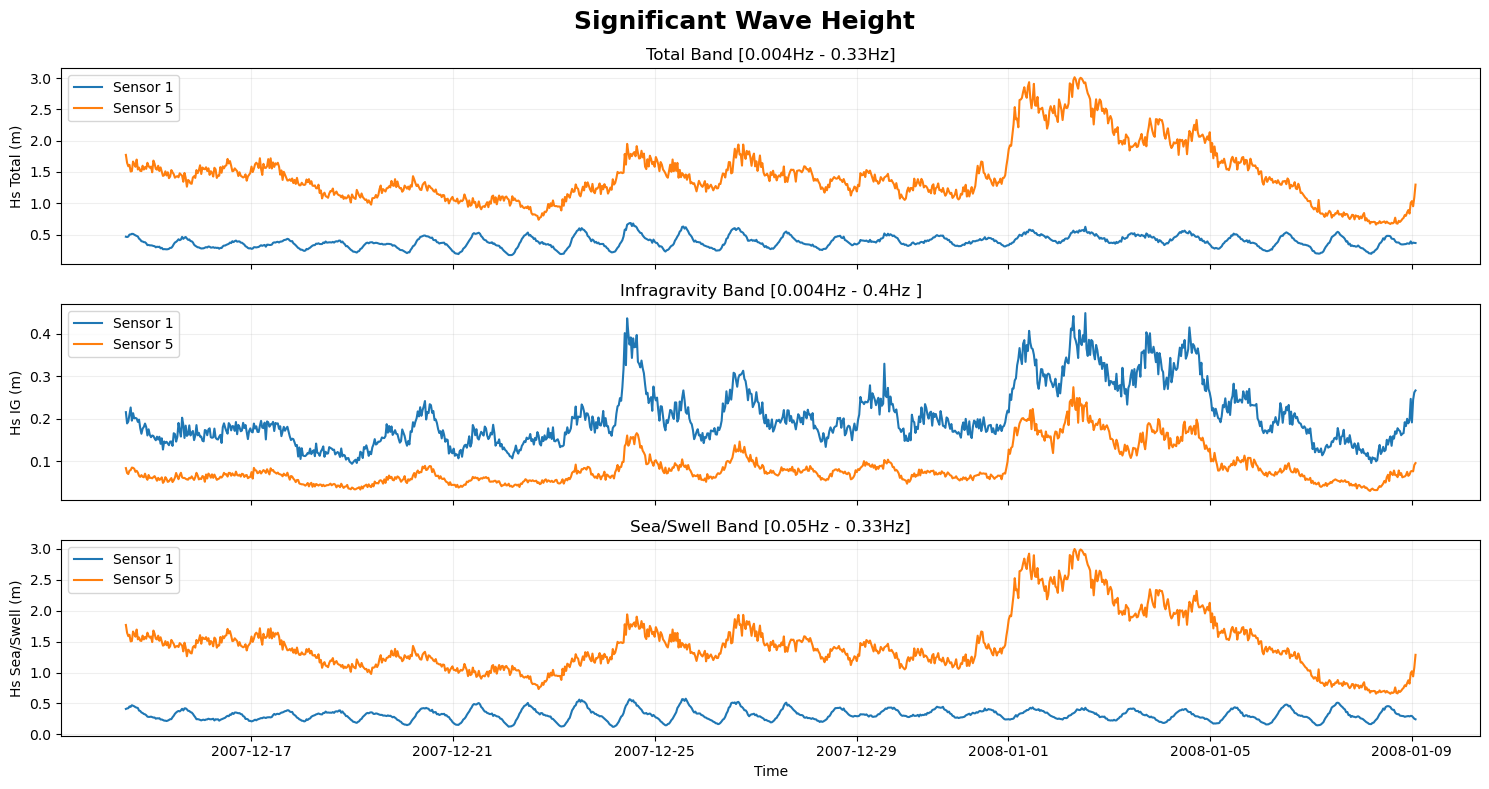

In [ ]:
fs = 1.0
nperseg = 4096
noverlap = 2048
hop_seconds = (nperseg - noverlap) / fs   # ~2048 s
tol = pd.Timedelta(seconds=hop_seconds/2) # ~1024 s

#Put Sensor 1 values on a time index (Series)
s1_tot = pd.Series(Hs1_tot, index=pd.to_datetime(teta1)).sort_index()
s1_ig  = pd.Series(Hs1_ig,  index=pd.to_datetime(teta1)).sort_index()
s1_ss  = pd.Series(Hs1_ss,  index=pd.to_datetime(teta1)).sort_index()

# Build the query index from Sensor 5 times
t5_idx = pd.to_datetime(teta5)

# Vectorized nearest-neighbor lookup with tolerance
idx = s1_tot.index.get_indexer(t5_idx, method="nearest", tolerance=tol)
ok = idx != -1  # matched within tolerance

# Aligned outputs (Sensor 5 times that found a match)
t_aligned      = t5_idx[ok].values.astype("datetime64[ns]")
Hs5_tot_aln    = Hs5_tot[ok]
Hs5_ig_aln     = Hs5_ig[ok]
Hs5_ss_aln     = Hs5_ss[ok]

Hs1_tot_aln    = s1_tot.values[idx[ok]]
Hs1_ig_aln     = s1_ig.values[idx[ok]]
Hs1_ss_aln     = s1_ss.values[idx[ok]]

## ------------- Plotting Code ------------ ##

# Total Hs
fig, axes = plt.subplots(3,1, figsize=(15,8), sharex=True)
fig.suptitle('Significant Wave Height', fontsize=18, weight='bold')

axes[0].plot(t_aligned, Hs1_tot_aln, label="Sensor 1")
axes[0].plot(t_aligned, Hs5_tot_aln, label="Sensor 5")
axes[0].set_ylabel("Hs Total (m)")
axes[0].set_title("Total Band [0.004Hz - 0.33Hz]")
axes[0].grid(True, alpha=0.2)
axes[0].legend(loc="upper left")

# IG band
axes[1].plot(t_aligned, Hs1_ig_aln, label="Sensor 1")
axes[1].plot(t_aligned, Hs5_ig_aln, label="Sensor 5")
axes[1].set_ylabel("Hs IG (m)")
axes[1].set_title("Infragravity Band [0.004Hz - 0.4Hz ]")
axes[1].grid(True, alpha=0.2)
axes[1].legend(loc="upper left")


# Sea/Swell band
axes[2].plot(t_aligned, Hs1_ss_aln, label="Sensor 1")
axes[2].plot(t_aligned, Hs5_ss_aln, label="Sensor 5")
axes[2].set_ylabel("Hs Sea/Swell (m)")
axes[2].set_title("Sea/Swell Band [0.05Hz - 0.33Hz]")
axes[2].grid(True, alpha=0.2)
axes[2].legend(loc="upper left")

axes[2].set_xlabel("Time")

plt.tight_layout()
plt.show()

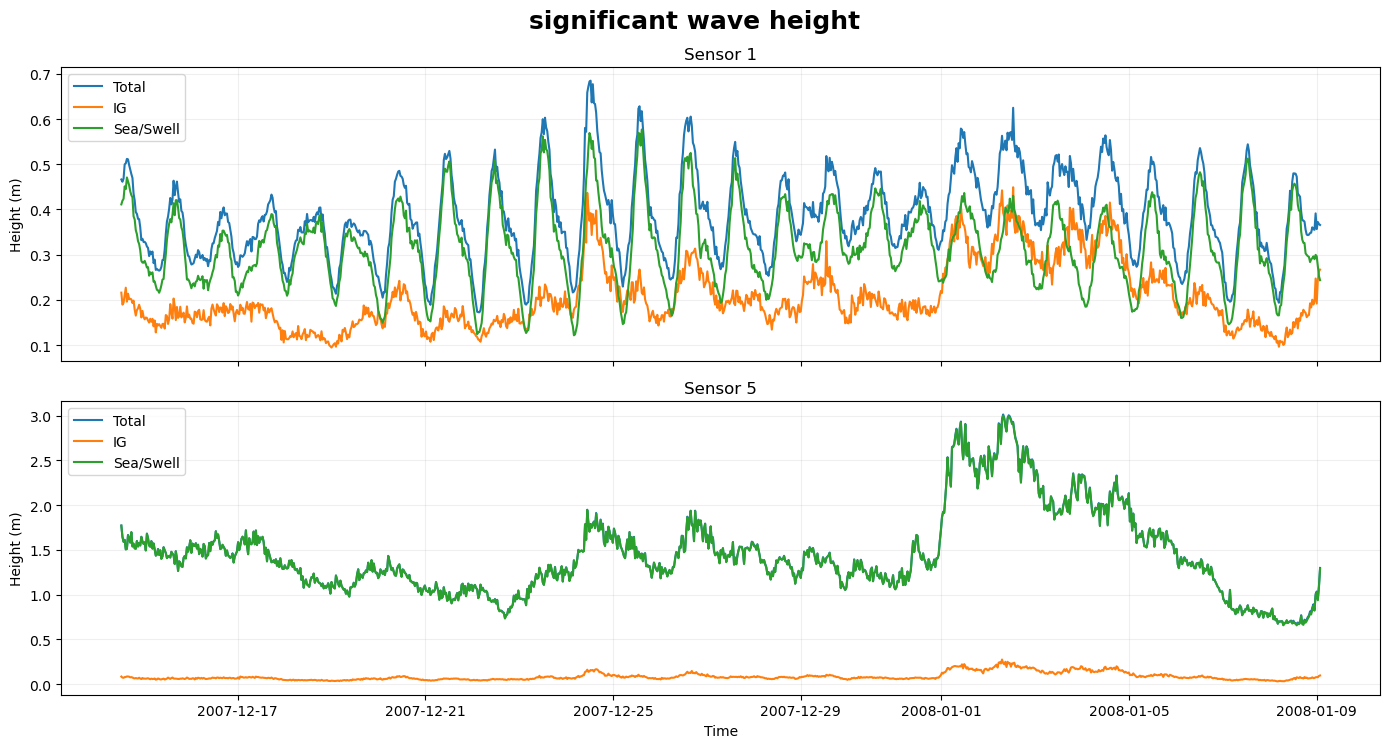

In [123]:
fig, axes = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# --- Sensor 1 ---
axes[0].plot(t_aligned, Hs1_tot_aln, label="Total")
axes[0].plot(t_aligned, Hs1_ig_aln, label="IG")
axes[0].plot(t_aligned, Hs1_ss_aln, label="Sea/Swell")
axes[0].set_ylabel("Height (m)")
axes[0].set_title("Sensor 1")
axes[0].legend(loc="upper left")
axes[0].grid(True, alpha = 0.2)

# --- Sensor 5 ---
axes[1].plot(t_aligned, Hs5_tot_aln, label="Total")
axes[1].plot(t_aligned, Hs5_ig_aln, label="IG")
axes[1].plot(t_aligned, Hs5_ss_aln, label="Sea/Swell")
axes[1].set_ylabel("Height (m)")
axes[1].set_title("Sensor 5")
axes[1].legend(loc="upper left")
axes[1].grid(True, alpha = 0.2)

axes[1].set_xlabel("Time")

fig.suptitle("significant wave height", fontsize=18, weight='bold', y= 0.93)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Post meeting w mark (6NOV)
- Correct sensor issue (use sensor 6)
- Plot Hs vs setup (w color coded tide)
- Plot peak periods of xmas miracle 
- Cospectra 
- Wave transformation over reef thru sensors
- Update sensor chart 

After meeting with mark, we noticed that the pressure sensors were incorrectly labelled. Sensor 5 is an aquadopp although the chart says it is a seabird. In order for an accurate comparison, I want to use two seabird sesnors so I am going to do the same analysis from earlier this week but usng the more offshore sensor 6

In [128]:
## Data has been processed into saved dataframes located in data_interim folder


## --------- Load Sensors ----------- ##
df1 = pd.read_parquet("data_interim/df1.parquet")
df6 = pd.read_parquet('data_interim/df6.parquet')


##### Tide visualization

/var/folders/7q/04p1sn755vg5x39skt2hykjh0000gn/T/ipykernel_59876/3017662744.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  tide1 = df1["h_tide"].resample("15T").mean()
/var/folders/7q/04p1sn755vg5x39skt2hykjh0000gn/T/ipykernel_59876/3017662744.py:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  tide6 = df6["h_tide"].resample("15T").mean()
/var/folders/7q/04p1sn755vg5x39skt2hykjh0000gn/T/ipykernel_59876/3017662744.py:30: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  r1 = df1["h_detided"].resample('15T').mean() - df1["h_detided"].mean()
/var/folders/7q/04p1sn755vg5x39skt2hykjh0000gn/T/ipykernel_59876/3017662744.py:31: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  r5 = df6["h_detided"].resample('15T').mean() - df6["h_detided"].mean()


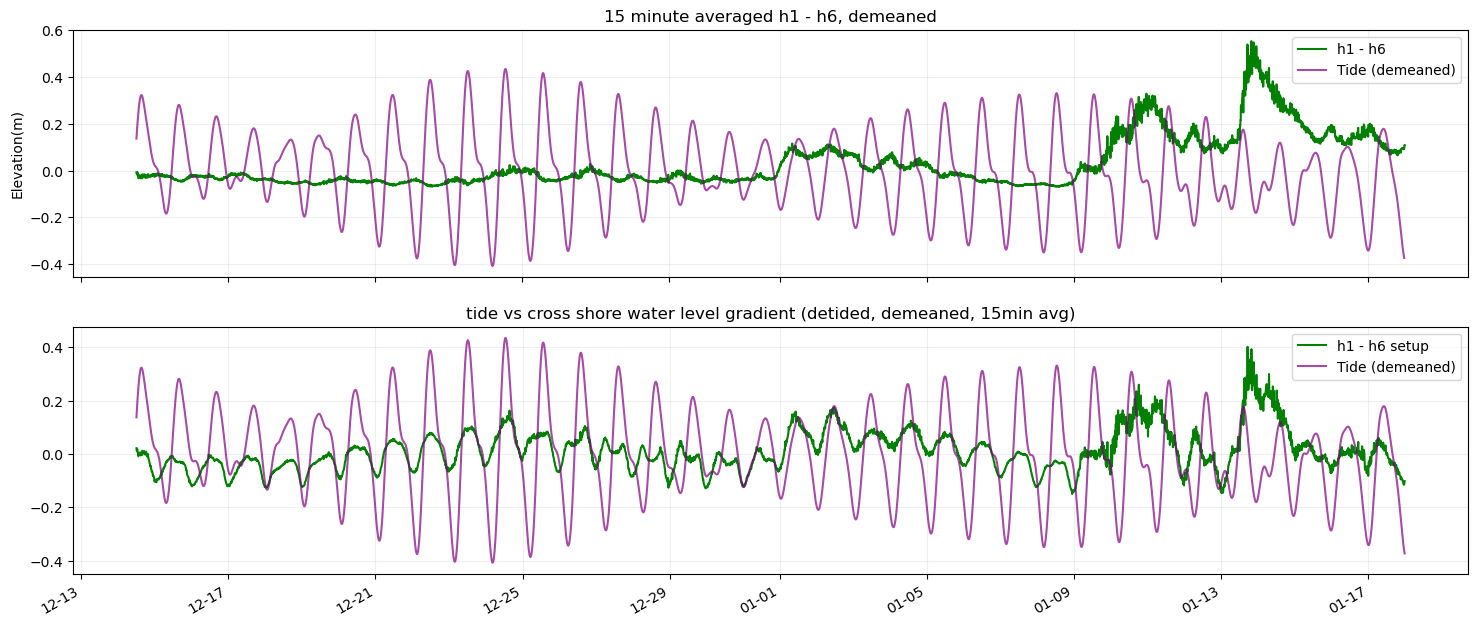

In [134]:
# Resample tidal signals
tide1 = df1["h_tide"].resample("15T").mean()
tide6 = df6["h_tide"].resample("15T").mean()

# Align the overlapping segment
tide1_aligned, tide6_aligned = tide1.align(tide6, join="inner")

# Use average of two as reference tide
tide_mean = 0.5 * (tide1_aligned + tide6_aligned)
# Demean )
tide_anom = tide_mean - tide_mean.mean()


fig, ax = plt.subplots(2, figsize=(18,8))

# plot hi - hf (demeaned)
p1 = df1["h_15"] - df1["h_15"].mean()
p6 = df6["h_15"] - df6["h_15"].mean()
p1_aligned, p6_aligned = p1.align(p6, join="inner")   # keep only overlapping times

ax[0].plot(p1_aligned.index, p1_aligned - p6_aligned, label='h1 - h6', color='green')
ax[0].plot(tide_anom.index, tide_anom, label="Tide (demeaned)", alpha=0.7, color='purple')

ax[0].set_title('15 minute averaged h1 - h6, demeaned')
ax[0].set_ylabel('Elevation(m)')
ax[0].grid(True, alpha = 0.2)
ax[0].legend()

# plot detided, demeaned hi - hf
r1 = df1["h_detided"].resample('15T').mean() - df1["h_detided"].mean()
r5 = df6["h_detided"].resample('15T').mean() - df6["h_detided"].mean()
r1_aligned, r6_aligned = r1.align(r5, join = 'inner')

# Now plot it together with setup (r1_aligned - r6_aligned)
setup = (r1_aligned - r6_aligned)

ax[1].plot(setup.index, setup, label="h1 - h6 setup", color='green')
ax[1].plot(tide_anom.index, tide_anom, label="Tide (demeaned)", alpha=0.7, color='purple')
ax[1].set_title('tide vs cross shore water level gradient (detided, demeaned, 15min avg)')
ax[1].legend()
ax[1].grid(True, alpha=0.2)

date_fmt = mdates.DateFormatter("%m-%d")
for axis in ax.flat:
    axis.xaxis.set_major_formatter(date_fmt)
fig.autofmt_xdate()  

plt.show()

ok tide is jacked up. no use in harping on this for too long but it is something of concern for the future that **must be addressed**

##### Hs

In [150]:
## ---------- Spectra @ ~1hr windows -------------- ##

from BulkWaveStats import Spp_to_Seta

# spectral inputs
nperseg = 4096
noverlap = int(0.5 * nperseg) # 50% overlap

## -------- Sensor 1 ------- ##
xx = df1['p_detided']
# get sampling rate from the index 
dt = np.median(np.diff(xx.index.view('int64'))) / 1e9  # seconds (int64 ns → s)
fs = 1.0 / dt
# take spectra or detided pressure
f1, t_spec1, Spp1 = spectrogram(
    xx.values, 
    fs=fs, 
    window = 'hann',
    nperseg = nperseg,
    noverlap=noverlap,
    detrend='linear',
    scaling='density',
    mode='psd',
)
# Spp_to_Seta converts to surface elevation using transfer function from Falk's notes
Seta1, teta1, heta1 = Spp_to_Seta(Spp1, f1, t_spec1, df1.index.values, df1['h'].values)
# collect variables into an xarray dataset
psd1 = xr.Dataset(
    data_vars={
        "Seta": (("frequency", "time"), Seta1),
        "h_mean": (("time",), heta1),
    },
    coords={
        "frequency": xr.DataArray(f1, dims="frequency", attrs={"units": "Hz"}),
        "time": xr.DataArray(teta1, dims="time", attrs={"long_name": "spectral time axis"}),
    },
    attrs={"source": "Spp_to_Seta output"},
)

## ----------------- Sensor 6 ------------- ##
yy = df6['p_detided']
# get sampling rate from the index 
dt = np.median(np.diff(yy.index.view('int64'))) / 1e9  # seconds (int64 ns → s)
fs = 1.0 / dt
# take spectra or detided pressure
f6, t_spec6, Spp6 = spectrogram(
    yy.values, 
    fs=fs, 
    window = 'hann',
    nperseg = nperseg,
    noverlap=noverlap,
    detrend='linear',
    scaling='density',
    mode='psd',
)
# Spp_to_Seta converts to surface elevation using transfer function from Falk's notes
Seta6, teta6, heta6 = Spp_to_Seta(Spp6, f6, t_spec6, df6.index.values, df6['h'].values)
# collect variables into an xarray dataset
S6 = xr.Dataset(
    data_vars={
        "Seta": (("frequency", "time"), Seta6),
        "h_mean": (("time",), heta6),
    },
    coords={
        "frequency": xr.DataArray(f6, dims="frequency", attrs={"units": "Hz"}),
        "time": xr.DataArray(teta6, dims="time", attrs={"long_name": "spectral time axis"}),
    },
    attrs={"source": "Spp_to_Seta output"},
)

In [ ]:
## ------ Compute significant wave height ------- ##
Hs1 , Hs1ig, Hs1ss = sig_wave_height(Seta1, f1, t_spec1)
Hs6 , Hs6ig, Hs6ss = sig_wave_height(Seta6, f6, t_spec6)


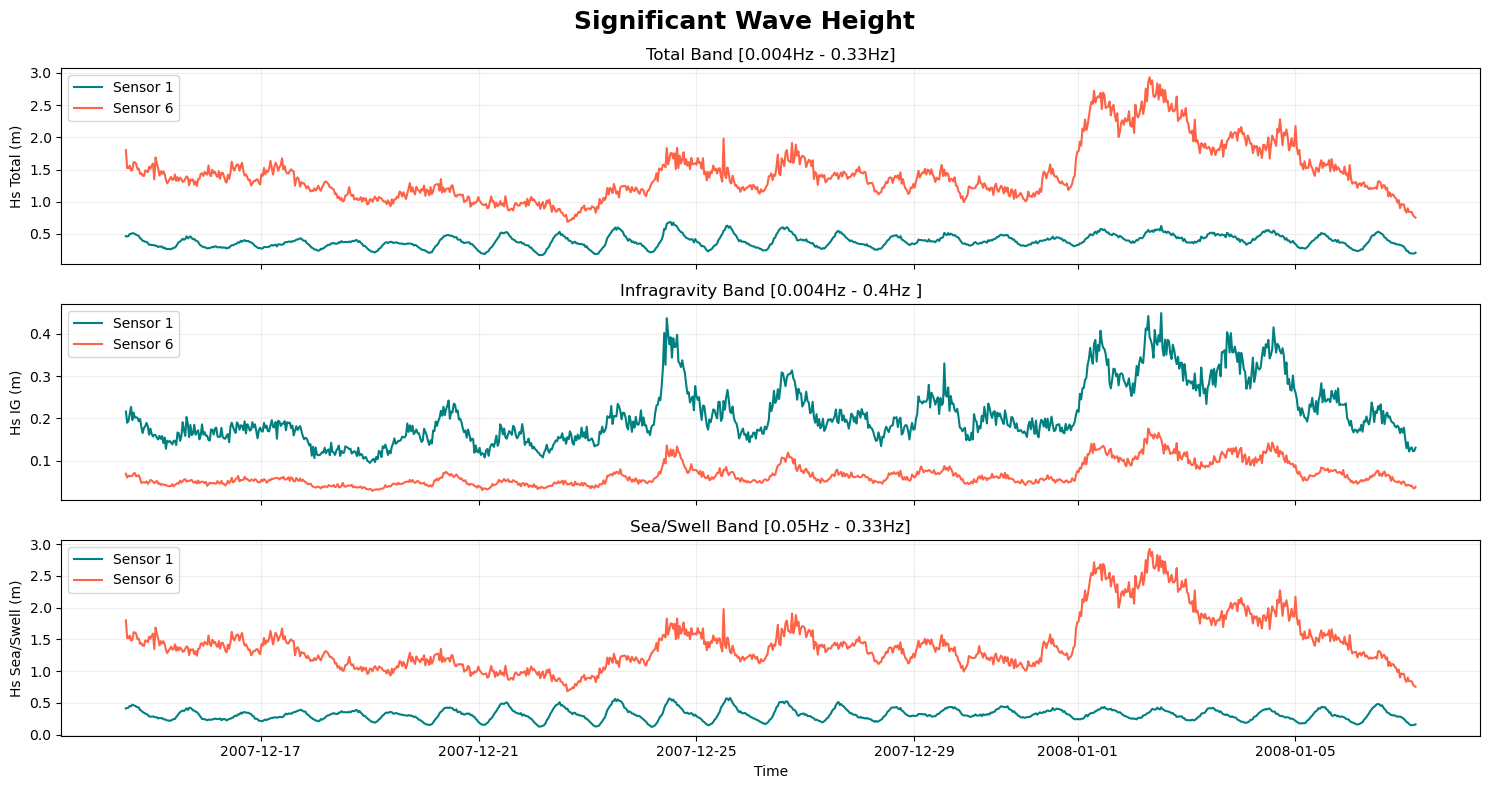

In [ ]:
## ------- Plot Hs Comparisons --------- ##
fs = 1.0
nperseg = 4096
noverlap = 2048
hop_seconds = (nperseg - noverlap) / fs   # ~2048 s
tol = pd.Timedelta(seconds=hop_seconds/2) # ~1024 s

#Put Sensor 1 values on a time index (Series)
s1_tot = pd.Series(Hs1, index=pd.to_datetime(teta1)).sort_index()
s1_ig  = pd.Series(Hs1ig,  index=pd.to_datetime(teta1)).sort_index()
s1_ss  = pd.Series(Hs1ss,  index=pd.to_datetime(teta1)).sort_index()

# Build the query index from Sensor 6 times
t6_idx = pd.to_datetime(teta6)

# Vectorized nearest-neighbor lookup with tolerance
idx = s1_tot.index.get_indexer(t6_idx, method="nearest", tolerance=tol)
ok = idx != -1  # matched within tolerance

# Aligned outputs (Sensor 6 times that found a match)
t_aligned      = t6_idx[ok].values.astype("datetime64[ns]")
Hs6_tot_aln    = Hs6[ok]
Hs6_ig_aln     = Hs6ig[ok]
Hs6_ss_aln     = Hs6ss[ok]

Hs1_tot_aln    = s1_tot.values[idx[ok]]
Hs1_ig_aln     = s1_ig.values[idx[ok]]
Hs1_ss_aln     = s1_ss.values[idx[ok]]

## ------------- Plotting Code ------------ ##
# Total Hs
fig, axes = plt.subplots(3,1, figsize=(15,8), sharex=True)
fig.suptitle('Significant Wave Height', fontsize=18, weight='bold')

axes[0].plot(t_aligned[0:1000], Hs1_tot_aln[0:1000], label="Sensor 1", color='teal')
axes[0].plot(t_aligned[0:1000], Hs6_tot_aln[0:1000], label="Sensor 6", color='tomato')
axes[0].set_ylabel("Hs Total (m)")
axes[0].set_title("Total Band [0.004Hz - 0.33Hz]")
axes[0].grid(True, alpha=0.2)
axes[0].legend(loc="upper left")

# IG band
axes[1].plot(t_aligned[0:1000], Hs1_ig_aln[0:1000], label="Sensor 1", color='teal')
axes[1].plot(t_aligned[0:1000], Hs6_ig_aln[0:1000], label="Sensor 6", color='tomato')
axes[1].set_ylabel("Hs IG (m)")
axes[1].set_title("Infragravity Band [0.004Hz - 0.4Hz ]")
axes[1].grid(True, alpha=0.2)
axes[1].legend(loc="upper left")

# Sea/Swell band
axes[2].plot(t_aligned[0:1000], Hs1_ss_aln[0:1000], label="Sensor 1", color='teal')
axes[2].plot(t_aligned[0:1000], Hs6_ss_aln[0:1000], label="Sensor 6", color='tomato')
axes[2].set_ylabel("Hs Sea/Swell (m)")
axes[2].set_title("Sea/Swell Band [0.05Hz - 0.33Hz]")
axes[2].grid(True, alpha=0.2)
axes[2].legend(loc="upper left")

axes[2].set_xlabel("Time")

plt.tight_layout()
plt.show()

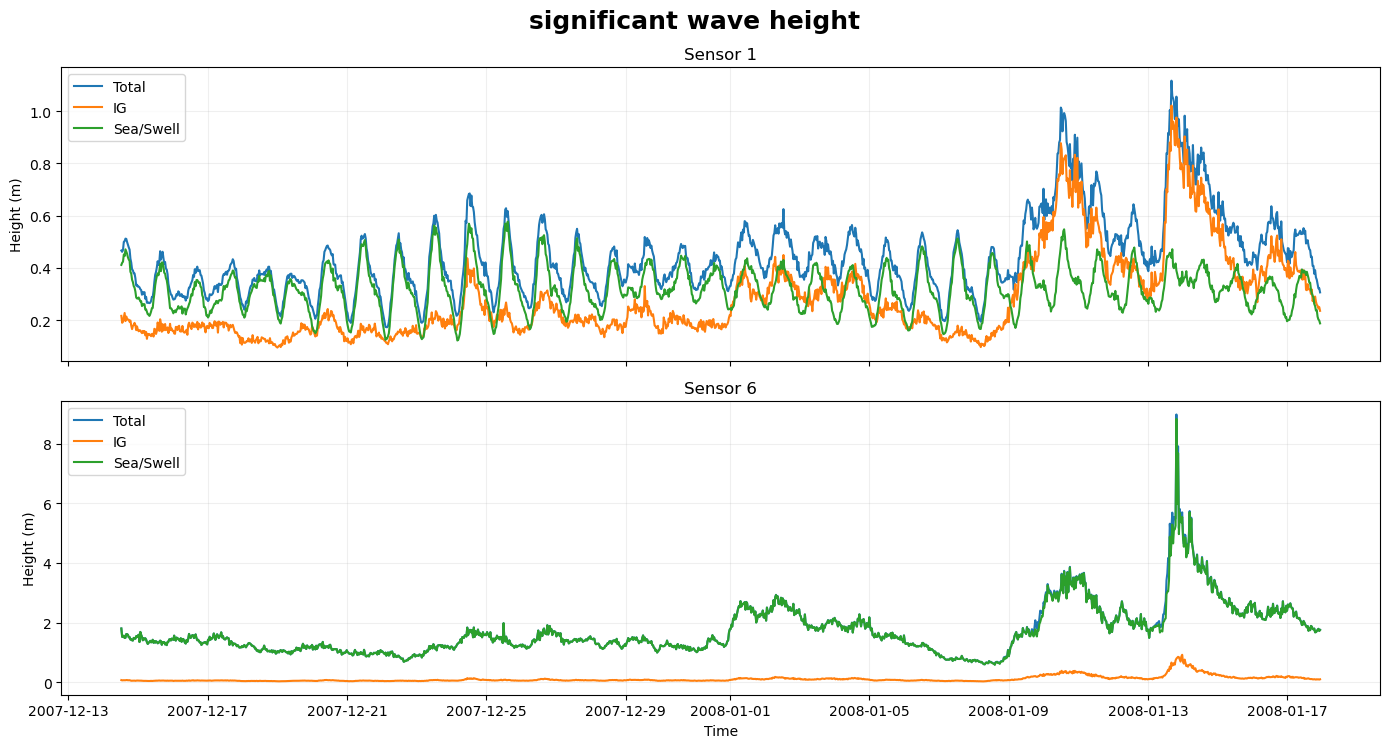

In [156]:
## ----------- Hs plot by sensor ------------- ##

fig, axes = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# --- Sensor 1 ---
axes[0].plot(t_aligned, Hs1_tot_aln, label="Total")
axes[0].plot(t_aligned, Hs1_ig_aln, label="IG")
axes[0].plot(t_aligned, Hs1_ss_aln, label="Sea/Swell")
axes[0].set_ylabel("Height (m)")
axes[0].set_title("Sensor 1")
axes[0].legend(loc="upper left")
axes[0].grid(True, alpha = 0.2)

# --- Sensor 5 ---
axes[1].plot(t_aligned, Hs6_tot_aln, label="Total")
axes[1].plot(t_aligned, Hs6_ig_aln, label="IG")
axes[1].plot(t_aligned, Hs6_ss_aln, label="Sea/Swell")
axes[1].set_ylabel("Height (m)")
axes[1].set_title("Sensor 6")
axes[1].legend(loc="upper left")
axes[1].grid(True, alpha = 0.2)

axes[1].set_xlabel("Time")

fig.suptitle("significant wave height", fontsize=18, weight='bold', y= 0.93)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

##### Setup

i would like to make a plot that has offshore Hs on the x axis and setup on the y axis to see if theres a correlation. If there is, then I would like to color code a tidal signal to see if tide modulations has an effect on wave setup. 

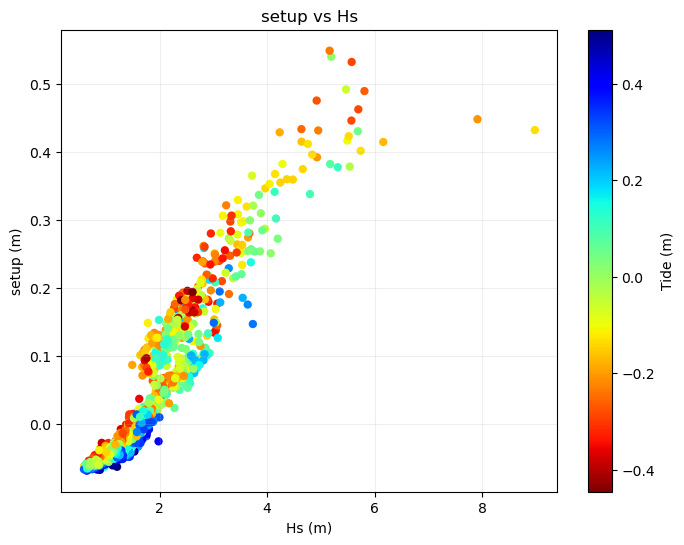

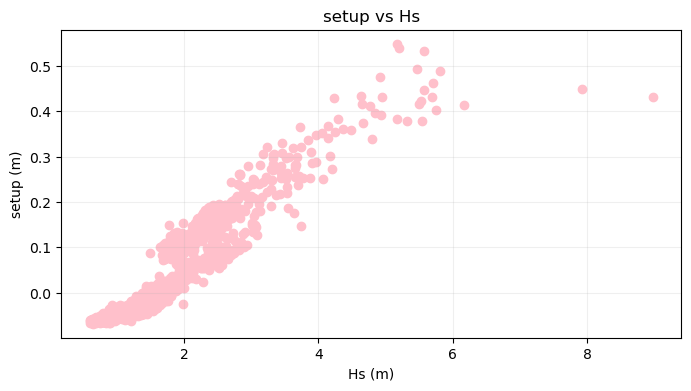

In [189]:
import pandas as pd
## ---- Hs from earlier cells (using sensor 6 as offshore proxy) ---- ##
Hs = pd.Series(Hs6, index=pd.to_datetime(teta6)).sort_index()
Hs_ig  = pd.Series(Hs6ig,  index=pd.to_datetime(teta6)).sort_index()
Hs_ss  = pd.Series(Hs6ss,  index=pd.to_datetime(teta6)).sort_index()

## --- Cross-shore water level gradient, n ---- ##
p1 = df1["h_15"] - df1["h_15"].mean()
p6 = df6["h_15"] - df6["h_15"].mean()
p1_aligned, p6_aligned = p1.align(p6, join="inner")   # keep only overlapping times
n = pd.Series(p1_aligned - p6_aligned, index=pd.to_datetime(p6_aligned.index.values))

##------ align time between n and Hs -------- ##
fs = 1.0
nperseg = 4096
noverlap = 2048
hop_seconds = (nperseg - noverlap) / fs          # 2048 s
tol = pd.Timedelta(seconds=hop_seconds / 2)      # 1024 s (nearest-neighbor tolerance)

t_idx = Hs.index                                  # target time base (sensor 6 spectral centers)
# nearest index positions in n for each Hs time (within tol)
pos = n.index.get_indexer(t_idx, method="nearest", tolerance=tol)
mask = pos != -1                                  # keep only matches within tolerance

# aligned outputs (same index, same length)
Hs_aligned = Hs.iloc[mask]
n_aligned  = n.iloc[pos[mask]].set_axis(Hs_aligned.index)

import matplotlib.pyplot as plt

# --- existing alignment code above this point ---

# Tide series on the sensor-6 clock
tide = pd.Series(df6["h_tide"].values - df6['h_tide'].mean(), index=pd.to_datetime(df6.index)).sort_index()

# nearest-match tide values evaluated at the retained spectral times
tide_at_spec = tide.reindex(Hs_aligned.index, method="nearest", tolerance=tol)
valid = tide_at_spec.notna()          # drop any points outside the tolerance

Hs_plot = Hs_aligned[valid]
n_plot = n_aligned[valid]
tide_plot = tide_at_spec[valid]

fig, ax = plt.subplots(figsize=(8, 6))
sc = ax.scatter(Hs_plot, n_plot, c=tide_plot, cmap="jet_r", edgecolor="none")

ax.set_xlabel("Hs (m)")
ax.set_ylabel("setup (m)")
ax.set_title("setup vs Hs")
ax.grid(True, alpha=0.2)

cbar = fig.colorbar(sc, ax=ax)
cbar.set_label("Tide (m)")

plt.show()


## plot data

fig, ax =plt.subplots(figsize=(8,4))
ax.scatter(Hs_aligned, n_aligned, color = 'pink')
ax.set_xlabel('Hs (m)')
ax.set_ylabel('setup (m)')
ax.set_title('setup vs Hs')
ax.grid(True, alpha=0.2)

